<a href="https://colab.research.google.com/github/hiroto-noguchi/book_2023/blob/main/chapter_1/1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# re をインポートする。
import re
'''linguistics が条件arch.+logy を満たせばオブジェ
クトを返す。'''
re.search('arch.+logy', 'linguistics')

In [2]:
'''archaeology が条件arch.+logy を満たせばオブジェ
クトを返す。'''
re.search('arch.+logy', 'archaeology')

<re.Match object; span=(0, 11), match='archaeology'>

In [3]:
# マッチした文字列を返す。
re.search('arch.+logy',
'archaeology').group()

'archaeology'

In [4]:
# 単語のリストを定義する。
words = ['arch', 'archaeology', 'biology']
''' 検索パターン（'arch' で始まり、'logy' で終わる文
字列）を定義する。'''
pattern = re.compile('arch.+logy')
''' 単語リストをループして検索パターンに一致するものを
表示する。'''
for word in words:
  result = pattern.search(word)
  if result:
    print(result.group())

archaeology


In [6]:
'''a とc のあいだに任意の1 文字が入る文字列にマッチさ
せる。'''
re.search('a.c', 'abc').group()

'abc'

In [7]:
'''a の後ろでa が1 回以上繰り返され、c に続く文字列に
マッチさせる。'''
re.search('a+c', 'aac').group()

'aac'

In [8]:
'''ac もしくはa とc のあいだに、任意の1 文字が入る文
字列にマッチさせる。'''
re.search('a.?c', 'ac').group()

'ac'

In [9]:
# [] の中の文字1 つとd の場合にマッチさせる。
re.search('[abc]d', 'ad').group()

'ad'

In [10]:
# [] の中の文字以外とd の場合にマッチさせる。
re.search('[^abc]d', 'dd').group()

'dd'

In [11]:
# 半角の数字にマッチさせる。
re.search('[0-9]+', 'ab01２３').group()

'01'

In [12]:
# 半角数字とはさまれたひらがなを取り出す。
re.search('[0-9][ぁ-ん]+[0-9]',
'aあいbう1えお2').group()

'1えお2'

In [13]:
''' 後方参照を利用して、半角数字にはさまれたひらがなの
みを取り出す。'''
re.search('([0-9])([ぁ-ん]+)([0-9])',
'aあいbう1えお2').group(2)

'えお'

In [14]:
'''URL の末尾を引数にしてスクレイピングしたテキストを
返す関数を定義する。'''
import pandas as pd
from collections import Counter
def collect_texts(items):
  import requests
  from bs4 import BeautifulSoup
  import time
  text = ''
  base = 'https://en.wikipedia.org/wiki/'
  # 各アイテムに対してスクレイピングする。
  for item in items:
    webpage = requests.get(base + item)
    soup = BeautifulSoup(
    webpage.content, 'html.parser')
    p_tags = soup.find_all('p')
    ''' 各p タグのテキストを取得し、改行をスペースに
    置き換える。'''
    for p_tag in p_tags:
      text = text + p_tag.get_text()\
      .replace('\n', ' ')
    # 1 秒間待機する。
    time.sleep(1)
  return text
# 返ってきたテキストをtext に代入する。
text = collect_texts(['Language', 'English'])
# 40 回以上出現する単語をプリントする。
freq = Counter(text.lower().split())
df = pd.DataFrame.from_dict\
(freq, orient='index', columns=[
'frequency']).rename_axis('word')
df[df['frequency'] >= 40].sort_values(
'frequency', ascending=False)

,frequency
word,
the,762
of,581
and,365
in,307
to,302
a,267
language,234
is,213
as,183


In [15]:
# words のs を除去する。
re.sub('s$', '', 'words')

'word'

In [16]:
# 語末のs を削除する。
freq = Counter([re.sub('s$', '', word)
for word in text.lower().split()])
''' 辞書からデータフレームを作成し、インデックスを単語
に設定する。'''
df = pd.DataFrame.from_dict\
(freq, orient='index', columns=[
'frequency']).rename_axis('word')
# 頻度が40 以上の単語を降順に並べ替える。
df[df['frequency'] >= 40].sort_values(
'frequency', ascending=False)

,frequency
word,
the,762
of,581
a,450
language,373
and,365
in,307
to,302
i,214
that,181


In [17]:
# 語末のes もしくはs を削除する。
re.sub('e?s$', '', 'boxes')

'box'

In [18]:
# ies をy に置き換える。
re.sub('ies$', 'y', 'countries')

'country'

In [19]:
# 単語のリストを定義する。
words = ['words', 'boxes', 'countries']
# ies をy に置換する。
words = [re.sub('ies$', 'y', word)
for word in words]
# es またはs を削除する。
words = [re.sub('e?s$', '', word)
for word in words]
# 結果を表示する。
print(words)

['word', 'box', 'country']


In [20]:
# 単語リストを定義する。
words = ['words', 'boxes', 'countries']
# 各単語の末尾にある(e)s を削除する。
words = [re.sub('e?s$', '', word) for word in words]
# 各単語の末尾にあるies をy に置換する。
words = [re.sub('ies$', 'y', word) for word in words]
# 結果を表示する。
words

['word', 'box', 'countri']

In [21]:
# 正規表現を利用して屈折変化のs を処理する。
words = [word.lower()
for word in text.split()]
# ies をy に変換する。
words = [re.sub('ies$', 'y', word)
for word in words]
# es またはs を削除する。
words = [re.sub('e?s$', '', word)
for word in words]
# 単語の出現回数をカウントする。
freq = Counter(words)
# データフレームに変換し、列名を設定する。
df = pd.DataFrame.from_dict\
(freq, orient='index', columns=[
'frequency']).rename_axis('word')
# 出現回数が40 以上の単語を降順に表示する。
df[df['frequency'] >= 40].sort_values(
'frequency', ascending=False)

,frequency
word,
the,762
of,581
a,450
and,365
in,307
to,302
language,234
i,214
that,181


In [22]:
# 正規表現を使って単語の複数形を単数形に変換する。
# 単語のリストを作成する。
words = ['words', 'boxes', 'languages',
'countries', 'mice', 'tennis']
# 末尾がies の場合はy に置き換える。
words = [re.sub('ies$', 'y', word)
for word in words]
# 末尾がes またはs の場合は削除する。
words = [re.sub('e?s$', '', word)
for word in words]
# 結果を表示する。
print(words)

['word', 'box', 'languag', 'country', 'mice', 'tenni']


In [23]:
# NLTK のPorterStemmer をインポートする。
import nltk
# PorterStemmer のインスタンスを作成する。
porter = nltk.PorterStemmer()
# 単語リストを定義する。
words_list = ['words', 'boxes', 'languages',
'countries', 'mice', 'tennis']
''' 単語リストの各単語に対して、PorterStemmer を適用して語幹
を抽出する。'''
stemmed_words = [porter.stem(
word) for word in words_list]
# 結果を表示
print(stemmed_words)

['word', 'box', 'languag', 'countri', 'mice', 'tenni']


In [24]:
# LancasterStemmer をインポート
import nltk
from nltk.stem import LancasterStemmer
# LancasterStemmer のインスタンスを作成
lancaster = LancasterStemmer()
# 単語リストを作成する。
words = ['words', 'boxes', 'languages',
'countries', 'mice', 'tennis']
''' 単語リストの各単語に対して、LancasterStemmer を適用し、結
果をリストに格納する。'''
stemmed_words = [lancaster.stem(
word) for word in words]
# 結果を表示する。
print(stemmed_words)

['word', 'box', 'langu', 'country', 'mic', 'ten']


In [25]:
''' 必要なライブラリーをインポートおよびダウンロードす
る'''
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# 見出し語化（単語を基本形に変換）する
WordNetLemmatizer().lemmatize('words')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'word'

In [26]:
# 単語のリストを作成する。
words = ['words', 'boxes', 'countries',
'languages', 'mice', 'tennis']
'''WordNetLemmatizer を使用して単語の原形を取得し、
新しいリストに格納する。'''
words = [WordNetLemmatizer().lemmatize(word)
for word in words]
# 結果を表示する。
words

['word', 'box', 'country', 'language', 'mouse', 'tennis']

<Axes: xlabel='word'>

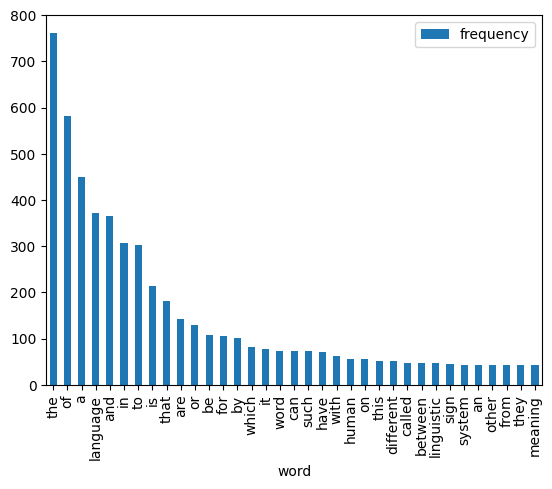

In [27]:
# テキストを小文字に変換し、単語ごとに分割する。
words = [word.lower()
for word in text.split()]
# WordNetLemmatizer を使って単語を原形に戻す。
words = [WordNetLemmatizer().lemmatize(word)
for word in words]
# 単語の出現回数をカウントする。
freq = Counter(words)
''' データフレームに変換し、単語をインデックスに設定す
る。'''
df = pd.DataFrame.from_dict\
(freq, orient='index', columns=[
'frequency']).rename_axis('word')
''' 出現回数が40 以上の単語を抽出し、降順に並べ替えて
棒グラフを描く。'''
df[df['frequency'] >= 40].sort_values(
'frequency', ascending=False)\
.plot(kind='bar')